Import Dependencies

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

2024-08-16 22:38:50.518116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 22:38:50.531639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 22:38:50.535629: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-16 22:38:50.546612: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-16 22:38:51.319205: W tensorflow/compiler/tf2

media pipe holistics

In [3]:
mp_holistic = mp.solutions.holistic  # media pipe holistic model 
mp_drawing = mp.solutions.drawing_utils # media pipe drawing utilities

In [4]:
def mediapipe_detection(image, model):
    # Convert the image from RGB to BGR for OpenCV processing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Improve performance by making the image array non-writeable
    image.flags.writeable = False

    # Process the image with the MediaPipe model
    results = model.process(image)

    # Make the image array writeable again
    image.flags.writeable = True

    # Convert the image back to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Return the processed image and the results
    return image, results


In [5]:
# Define custom drawing styles
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)

pose_landmark_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

left_hand_landmark_style = mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)
left_hand_connection_style = mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)

right_hand_landmark_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
right_hand_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,landmark_drawing_spec=face_landmark_style,connection_drawing_spec=face_connection_style) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,landmark_drawing_spec=pose_landmark_style,connection_drawing_spec=pose_connection_style) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=left_hand_landmark_style,connection_drawing_spec=left_hand_connection_style) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=right_hand_landmark_style,connection_drawing_spec=right_hand_connection_style) # Draw right hand connections


In [7]:
import cv2

# Open the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream or file")
    exit()

with mp_holistic.Holistic(min_detection_confidence= 0.5 , min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the camera


        if not ret: 
            print("Error: Failed to capture image")
            break
        

        image , results = mediapipe_detection(frame, holistic)
        print(results)

        draw_landmarks(image,results)
        
        cv2.imshow('CV2 Feed', image)  # Display the frame in a window named 'CV2 Feed'
        
        # Check if 'q' key is pressed to break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows



libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
len(results.face_landmarks.landmark)

468

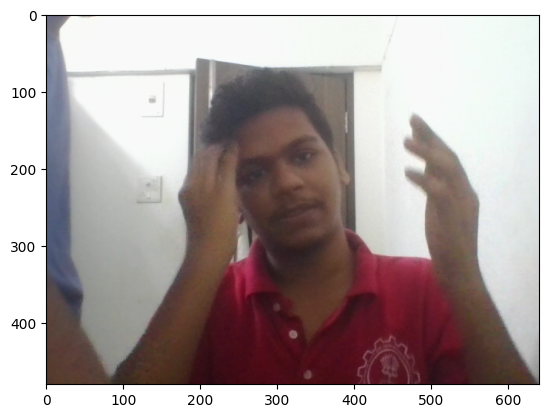

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
draw_landmarks(frame, results)

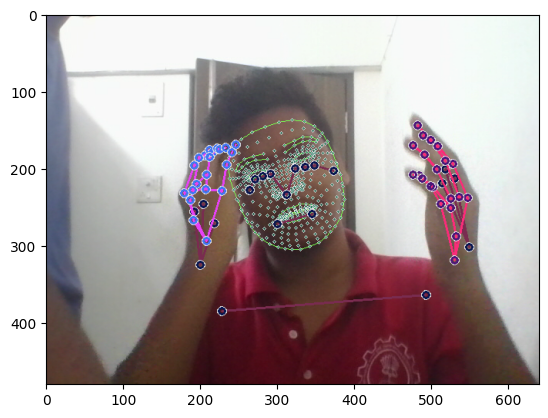

In [12]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

Extract the key point values

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
results.face_landmarks

landmark {
  x: 0.502898395
  y: 0.521473765
  z: -0.0316143222
}
landmark {
  x: 0.490161
  y: 0.475852609
  z: -0.0515183024
}
landmark {
  x: 0.495060682
  y: 0.491294861
  z: -0.0290230587
}
landmark {
  x: 0.472665846
  y: 0.440677971
  z: -0.0353318378
}
landmark {
  x: 0.486547709
  y: 0.462713331
  z: -0.0539354198
}
landmark {
  x: 0.482542
  y: 0.446999937
  z: -0.0489679798
}
landmark {
  x: 0.473696887
  y: 0.410968781
  z: -0.0200525019
}
landmark {
  x: 0.411737233
  y: 0.444654793
  z: 0.0205883142
}
landmark {
  x: 0.467082888
  y: 0.385267645
  z: -0.0114440555
}
landmark {
  x: 0.462650448
  y: 0.368876398
  z: -0.0119277658
}
landmark {
  x: 0.444683582
  y: 0.304752946
  z: 0.00444375491
}
landmark {
  x: 0.50469923
  y: 0.528000951
  z: -0.0307406746
}
landmark {
  x: 0.506275654
  y: 0.533073723
  z: -0.027899811
}
landmark {
  x: 0.507164121
  y: 0.535113454
  z: -0.0239168964
}
landmark {
  x: 0.508217394
  y: 0.538653672
  z: -0.0244205836
}
landmark {
  x: 0.5

In [15]:
results.face_landmarks.landmark

[x: 0.502898395
y: 0.521473765
z: -0.0316143222
, x: 0.490161
y: 0.475852609
z: -0.0515183024
, x: 0.495060682
y: 0.491294861
z: -0.0290230587
, x: 0.472665846
y: 0.440677971
z: -0.0353318378
, x: 0.486547709
y: 0.462713331
z: -0.0539354198
, x: 0.482542
y: 0.446999937
z: -0.0489679798
, x: 0.473696887
y: 0.410968781
z: -0.0200525019
, x: 0.411737233
y: 0.444654793
z: 0.0205883142
, x: 0.467082888
y: 0.385267645
z: -0.0114440555
, x: 0.462650448
y: 0.368876398
z: -0.0119277658
, x: 0.444683582
y: 0.304752946
z: 0.00444375491
, x: 0.50469923
y: 0.528000951
z: -0.0307406746
, x: 0.506275654
y: 0.533073723
z: -0.027899811
, x: 0.507164121
y: 0.535113454
z: -0.0239168964
, x: 0.508217394
y: 0.538653672
z: -0.0244205836
, x: 0.509491861
y: 0.543353736
z: -0.0263937525
, x: 0.511301041
y: 0.549812853
z: -0.0290710237
, x: 0.513579547
y: 0.557354271
z: -0.0286472403
, x: 0.518295527
y: 0.571719646
z: -0.0208622254
, x: 0.492375344
y: 0.483104795
z: -0.0471498892
, x: 0.484586477
y: 0.48761212

In [16]:
len(results.face_landmarks.landmark)

468

In [17]:
len(results.pose_landmarks.landmark)

33

In [18]:
# error comes when there is no left hand in the picture captured
len(results.left_hand_landmarks.landmark)

21

In [19]:
len(results.right_hand_landmarks.landmark)

21

In [20]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    face.append(test)

In [21]:
# 468*3 = 1404 it has 3 directions x y z
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [22]:
face[:10]

array([ 0.5028984 ,  0.52147377, -0.03161432,  0.490161  ,  0.47585261,
       -0.0515183 ,  0.49506068,  0.49129486, -0.02902306,  0.47266585])

In [23]:
# here we have 4 vars, x y z visibility so 33*4 = 132
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)


In [24]:
pose[:10]

array([ 0.48836288,  0.48754326, -0.9242171 ,  0.99993241,  0.50522888,
        0.41857618, -0.90097857,  0.99986553,  0.5256269 ,  0.41327408])

In [25]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [26]:
lh[:10]

array([ 8.29027295e-01,  6.65310442e-01, -1.03343787e-07,  8.32624972e-01,
        6.00048304e-01, -1.30303307e-02,  8.20743799e-01,  5.23462474e-01,
       -1.64940730e-02,  7.85012126e-01])

In [27]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [28]:
rh[:10]

array([3.26075912e-01, 6.13548696e-01, 2.09185444e-07, 2.99956948e-01,
       5.58209360e-01, 1.63209606e-02, 2.92767495e-01, 5.03298998e-01,
       1.68571156e-02, 3.05656582e-01])

In [29]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [30]:
result_test = extract_keypoints(results)


In [31]:
result_test

array([ 0.48836288,  0.48754326, -0.9242171 , ...,  0.38521022,
        0.35374996, -0.01399154])

Folder 

In [32]:
# folder path for the exported data , numpy array
DATA_PATH = os.path.join('MP_Data')

# Actions which we will try to detect
actions = np.array(['hello','thanks','iloveyou'])

# 30 videos for each action
no_sequences = 30

# 30 frames for each video
sequence_length = 30

In [33]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass


Collecting keypoint for training and testing

In [34]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

In [35]:
cap.release()
cv2.destroyAllWindows()

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [37]:
label_map = {label:num for num, label in enumerate(actions)}


In [38]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [39]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [40]:

np.array(sequences).shape


(90, 30, 1662)

In [41]:
np.array(labels).shape

(90,)

In [42]:
X = np.array(sequences)


In [43]:
y = to_categorical(labels).astype(int)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [47]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

I0000 00:00:1723828420.632241   65001 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723828420.744186   65001 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723828420.744449   65001 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723828420.746338   65001 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [48]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [49]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])


Epoch 1/200


I0000 00:00:1723828423.971991   65253 service.cc:146] XLA service 0xd2c24b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723828423.972017   65253 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-08-16 22:43:44.053409: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-16 22:43:44.517611: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904
2024-08-16 22:43:45.257169: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_84', 16 bytes spill stores, 16 bytes spill loads

2024-08-16 22:43:45.383244: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in fu

1/3 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - categorical_accuracy: 0.3750 - loss: 1.0939

I0000 00:00:1723828426.940817   65253 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-08-16 22:43:48.176138: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_84', 20 bytes spill stores, 20 bytes spill loads

2024-08-16 22:43:48.205565: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_84', 16 bytes spill stores, 16 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - categorical_accuracy: 0.3464 - loss: 2.0843
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.3170 - loss: 5.3977
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.3366 - loss: 10.1277
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.2701 - loss: 12.7906
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.2955 - loss: 7.2873
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.2936 - loss: 14.2689
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.3386 - loss: 14.9979
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.3914 - loss: 5.2570
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.4383 - loss: 3.7127
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.3639 - loss: 6.3383
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/ste

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


In [60]:
checkpoint_dir = "./checkpoints"
checkpoint_prefix = f"{checkpoint_dir}/ckpt.weights.h5"

# Create a callback that saves the model's weights
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,  # Only save the model's weights
    monitor='val_loss',  # Monitor the validation loss
    mode='min',  # Save the model when the monitored metric is at its minimum
    save_best_only=True,  # Only save the model when `val_loss` has improved
    verbose=1  # Print a message when saving the model
)


In [62]:
model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    callbacks=[tb_callback, checkpoint_callback],  # Include the checkpoint callback
    validation_data=(X_train, y_train)  # Assuming you have a validation dataset
)


Epoch 1/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.7188 - loss: 0.5258
Epoch 1: val_loss did not improve from 0.10498
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.7123 - loss: 0.5751 - val_categorical_accuracy: 0.7647 - val_loss: 0.5367
Epoch 2/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.8438 - loss: 0.5562
Epoch 2: val_loss did not improve from 0.10498
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.7710 - loss: 0.5864 - val_categorical_accuracy: 0.7059 - val_loss: 0.5726
Epoch 3/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.6562 - loss: 0.7025
Epoch 3: val_loss did not improve from 0.10498
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.6673 - loss: 0.6101 - val_categorical_accuracy: 0.6588 - val_loss: 0.6050
Epoch 4/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.7188 - loss: 0.5421
Epoch 4: val_loss did not improve from 0.10498
3/3 ━━━━━━━━━━

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [64]:
res = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [65]:
actions[np.argmax(res[4])]


'hello'

In [66]:
actions[np.argmax(y_test[4])]


'hello'

In [67]:
yhat = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [68]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrue, yhat)


0.6